In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
apps =pd.read_csv("../data/apps.csv")
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [4]:
# Cleaning and Converting column in appropriate data type

#Cleaning

#installs column ["+",","] occuring (i.e 10,000+) 
apps['Installs']=apps['Installs'].str.replace("+","")
apps['Installs']=apps['Installs'].str.replace(",","")

apps.rename({"Unnamed: 0":"index"}, axis="columns", inplace=True)

#Price column in $ occur(i.e $4.00)
apps['Price']=apps['Price'].str.replace("$","")

#Converting data type (object to numeric data)
apps['Installs']=apps['Installs'].astype(int)
apps['Price']=apps['Price'].astype(float)

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int32  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 1018.8+ KB


In [6]:
# In This Analysis in Mostly We focus Below
columns=["App","Category","Rating","Size","Installs","Price","Reviews"]


<b> we need Analyze Category wise apps frequency  </b>

In [7]:
#1.we need Analyze Category wise apps frequency
Unique_Category = apps['Category'].unique()
Unique_Category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [8]:
Frequency_Category = apps['Category'].value_counts().to_frame()  # Value_Count
Frequency_Category.rename({"Category": "count"}, axis=1,inplace=True)
Frequency_Category

,count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


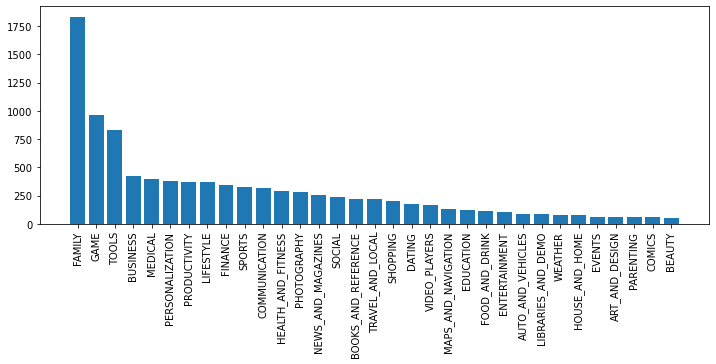

In [16]:

#plot
plt.figure(figsize=(12, 4))
plt.bar(Frequency_Category.index,Frequency_Category['count'])
plt.xticks(rotation=90)
plt.show()




<b> we need Analyze Ratings less 3 Rating and paid app(less_performance) </b>

In [10]:
#selecting useful colunmn 
less_performance=apps.loc[0:,['App','Rating','Price','Type','Installs','Reviews']].dropna() #here not count None value 

c1=less_performance['Rating']<3
c2=less_performance['Type']=='Paid'
less_performance=less_performance[c1 & c2 ]


#Total Earning individiual app
less_performance["Total_Earning"]=less_performance['Price']*less_performance['Installs']


# per rating public paid Money (i.e Here Below Table You See "I am extremely Rich" app  earn 131031$ per ratings so here
# public Lost big ,public paid big amount this app get only 1 rate it's worst app)

less_performance['per_rating_paid(by people)']=less_performance["Total_Earning"]/less_performance["Rating"]
less_performance.sort_values(by='per_rating_paid(by people)',ascending=False,inplace=True)
less_performance

,App,Rating,Price,Type,Installs,Reviews,Total_Earning,per_rating_paid(by people)
4401,I am extremely Rich,2.9,379.99,Paid,1000,41,379990.0,131031.034483
8882,Advanced EX for HYUNDAI,2.7,4.99,Paid,5000,168,24950.0,9240.740741
8892,Advanced EX for RENAULT,2.8,4.99,Paid,5000,130,24950.0,8910.714286
8890,Advanced EX for NISSAN,2.9,4.99,Paid,5000,164,24950.0,8603.448276
4729,Ai-Ball AV Recorder,2.7,2.99,Paid,5000,90,14950.0,5537.037037
1797,InfantRisk Center HCP,2.6,9.99,Paid,1000,41,9990.0,3842.307692
4679,BringGo AU & NZ,2.8,0.99,Paid,10000,440,9900.0,3535.714286
8884,Remote EX for NISSAN,2.3,1.49,Paid,5000,223,7450.0,3239.130435
5806,SkyTest BU/GU Lite,2.9,17.99,Paid,500,28,8995.0,3101.724138
407,Calculator,2.6,6.99,Paid,1000,57,6990.0,2688.461538


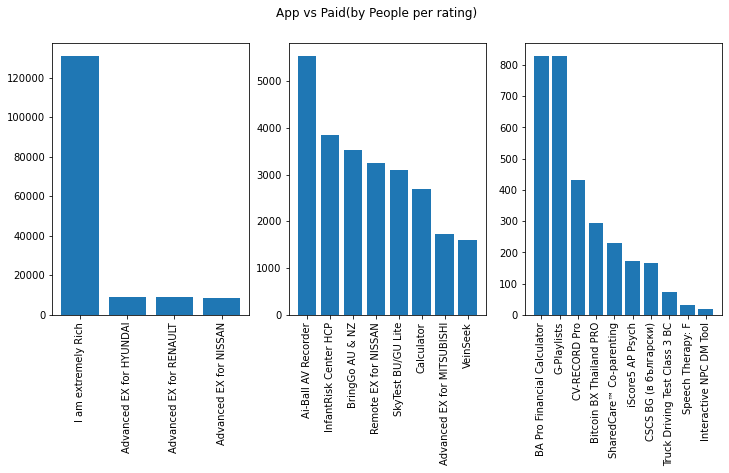

In [17]:
## ploting 
plt.figure(figsize=(12,5))
plt.suptitle("App vs Paid(by People per rating)")

#plot 1
plt.subplot(131) #subplot give us better Visualization
less_performance1=less_performance[0:4]
plt.bar(less_performance1['App'],less_performance1['per_rating_paid(by people)'])
plt.xticks(rotation=90)

#plot 2
plt.subplot(132)
less_performance2=less_performance[4:12]
plt.bar(less_performance2['App'],less_performance2['per_rating_paid(by people)'])
plt.xticks(rotation=90)

#plot 3
plt.subplot(133)
less_performance3=less_performance[12:]
plt.bar(less_performance3['App'],less_performance3['per_rating_paid(by people)'])
plt.xticks(rotation=90)

plt.show()

<b> Now we Comapare rating between free and paid app via Boxplot</b>


In [12]:
%matplotlib inline

<AxesSubplot:xlabel='Type', ylabel='Rating'>

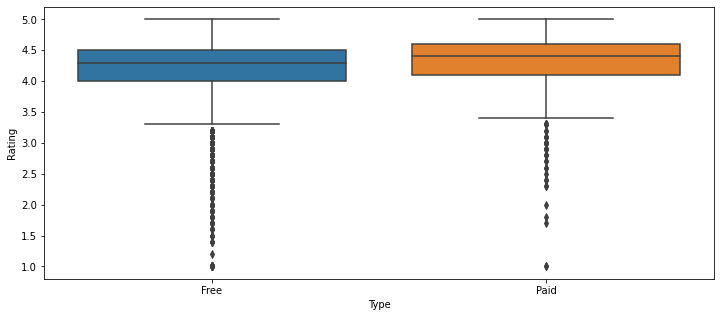

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot('Type','Rating',data=apps) 
# sns.boxplot('Type','Rating',data=apps,showfliers=False) without  outliers

In [14]:
#above plot you can see paid app Median slightly up.mid 50 % paid app get 4.1 to 4.60  rating while free mid 50% app 
#get 4 to 4.5 ratings here outliers not include 

<b> Now we make plot size vs Rating (bar) </b>

<Figure size 936x360 with 0 Axes>

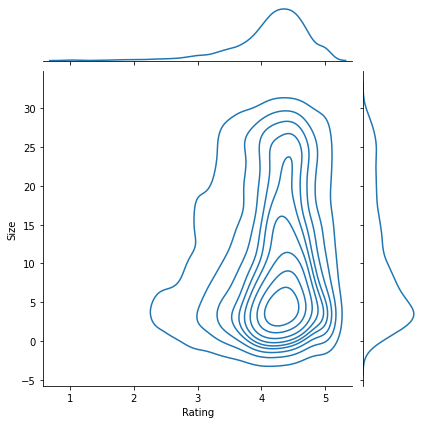

In [18]:
plt.figure(figsize=(13,5))
Rate_Size=apps[apps['Size']<30].dropna() #None Value not Count
sns.jointplot(data=Rate_Size,x='Rating', y='Size',kind='kde')
# sns.boxplot(apps['Rating'],apps['Size'],showfliers=False)
plt.xticks(rotation=90)
plt.show()
# Here Below plot you can see  4 Mb to 10Mb size give us best Performance 4 to 4.5 Rates 